In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import os

drive.mount('/content/drive')
PATH = '/content/drive/MyDrive/Datasets/Breast_Cancer.csv'

bc_df = pd.read_csv(PATH)

Mounted at /content/drive


# Variables categóricas sin codificar

In [ ]:
bc_df = pd.read_csv(PATH)
bc_df['Status'] = bc_df['Status'].apply(lambda x: {'Alive':1, 'Dead':0}.get(x))
bc_df = bc_df.drop(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'differentiate', 'A Stage', 'Marital Status'], axis=1)
bc_df

,Race,T Stage,N Stage,6th Stage,Grade,Estrogen Status,Progesterone Status,Status
0,White,T1,N1,IIA,3,Positive,Positive,1
1,White,T2,N2,IIIA,2,Positive,Positive,1
2,White,T3,N3,IIIC,2,Positive,Positive,1
3,White,T1,N1,IIA,3,Positive,Positive,1
4,White,T2,N1,IIB,3,Positive,Positive,1
...,...,...,...,...,...,...,...,...
4019,Other,T1,N1,IIA,2,Positive,Positive,1
4020,White,T2,N2,IIIA,2,Positive,Positive,1
4021,White,T2,N1,IIB,2,Positive,Negative,1
4022,Black,T2,N1,IIB,2,Positive,Positive,1


In [ ]:
# Save the dataset without any categorical encoding

path = '/content/drive/MyDrive/Datasets'
# data_paths = [os.path.join(pth, f) for pth, dirs, files in os.walk('/content/drive/MyDrive') for f in files]
bc_reduced_df.to_csv(os.path.join(path, 'bc_categ.csv'), index=False)

# Variables categóricas y numéricas

In [ ]:
bc_df = pd.read_csv(PATH)
bc_df['Status'] = bc_df['Status'].apply(lambda x: {'Alive':1, 'Dead':0}.get(x))
bc_df_catnum = bc_df.drop(['Race', 'Estrogen Status', 'Progesterone Status', 'differentiate', 'A Stage', 'Marital Status', 'T Stage ', 'N Stage', 'Grade'], axis=1)
bc_df_catnum

,Age,6th Stage,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,IIA,4,24,1,60,1
1,50,IIIA,35,14,5,62,1
2,58,IIIC,63,14,7,75,1
3,58,IIA,18,2,1,84,1
4,47,IIB,41,3,1,50,1
...,...,...,...,...,...,...,...
4019,62,IIA,9,1,1,49,1
4020,56,IIIA,46,14,8,69,1
4021,68,IIB,22,11,3,69,1
4022,58,IIB,44,11,1,72,1


In [ ]:
print(bc_df_catnum.head(7).to_latex(index=False,
                  float_format="{:.1f}".format,
))

\begin{tabular}{rlrrrrr}
\toprule
 Age & 6th Stage &  Tumor Size &  Regional Node Examined &  Reginol Node Positive &  Survival Months &  Status \\
\midrule
  68 &       IIA &           4 &                      24 &                      1 &               60 &       1 \\
  50 &      IIIA &          35 &                      14 &                      5 &               62 &       1 \\
  58 &      IIIC &          63 &                      14 &                      7 &               75 &       1 \\
  58 &       IIA &          18 &                       2 &                      1 &               84 &       1 \\
  47 &       IIB &          41 &                       3 &                      1 &               50 &       1 \\
  51 &       IIA &          20 &                      18 &                      2 &               89 &       1 \\
  51 &       IIA &           8 &                      11 &                      1 &               54 &       1 \\
\bottomrule
\end{tabular}



<ipython-input-8-3e0b08208cb7>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(bc_df_catnum.head(7).to_latex(index=False,


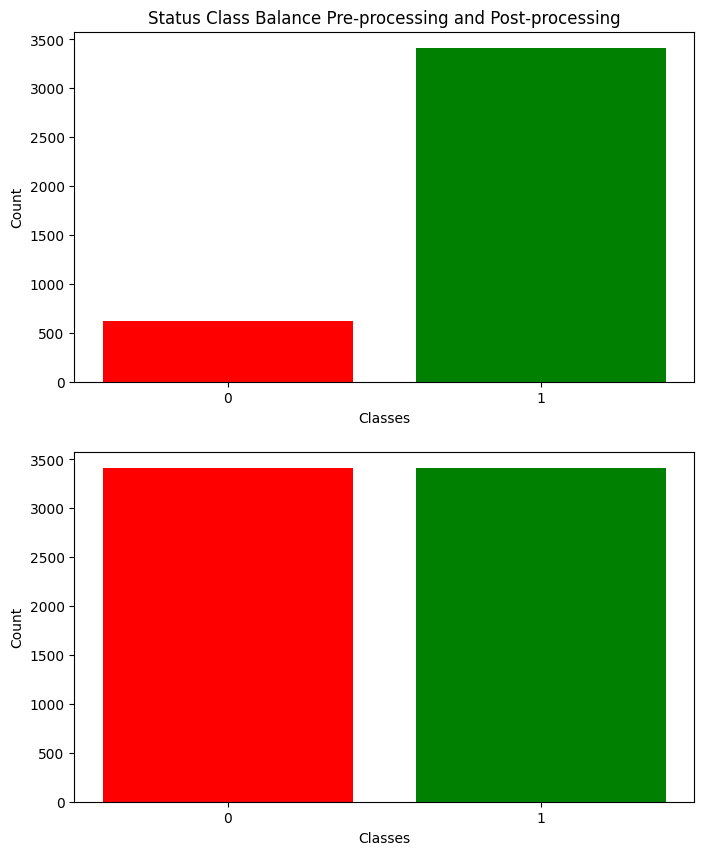

In [ ]:
def plot_target_distribution(df, target_column):
    """
    Plot the distribution of the target variable to check for class imbalance.

    Parameters:
    - df: DataFrame, the dataset containing the target variable.
    - target_column: str, the name of the target variable column.
    """
    # Count the occurrence of each class in the target variable
    class_count = df[target_column].value_counts()

    # Create a bar plot for the target variable
    plt.figure(figsize=(6, 4))
    plt.bar(class_count.index, class_count.values, color=['green', 'red'])



    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.title(f'Distribution of {target_column}')
    plt.xticks(class_count.index, [str(i) for i in class_count.index])

# Separate the dataset into majority and minority classes

bc_reduced_df = bc_df_catnum.copy()

minority_class = bc_reduced_df[bc_reduced_df['Status'] == 0]
majority_class = bc_reduced_df[bc_reduced_df['Status'] == 1]

# Oversample the minority class
minority_class_oversampled = minority_class.sample(len(majority_class), replace=True, random_state=42)

# Combine the oversampled minority class with the majority class
bc_reduced_df = pd.concat([majority_class, minority_class_oversampled])

fig, axes = plt.subplots(2, 1, figsize=(8,10))

class_count = bc_df['Status'].value_counts()
axes[0].bar(class_count.index, class_count.values, color=['green', 'red'], label='Unbalanced Target Class')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Count')
axes[0].set_title('Status Class Balance Pre-processing and Post-processing')
axes[0].set_xticks(class_count.index, [str(i) for i in class_count.index])

class_count = bc_reduced_df['Status'].value_counts()
axes[1].bar(class_count.index, class_count.values, color=['green', 'red'], label='Balanced Target Class')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Count')
axes[1].set_xticks(class_count.index, [str(i) for i in class_count.index])


In [ ]:
bc_reduced_df['Status'].value_counts()
bc_reduced_df

,Age,6th Stage,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,IIA,4,24,1,60,1
1,50,IIIA,35,14,5,62,1
2,58,IIIC,63,14,7,75,1
3,58,IIA,18,2,1,84,1
4,47,IIB,41,3,1,50,1
...,...,...,...,...,...,...,...
221,66,IIIA,35,20,7,50,0
1126,47,IIA,15,4,1,56,0
974,63,IIA,20,5,1,24,0
3476,62,IIIC,59,18,12,61,0


In [ ]:
var_df = pd.DataFrame(columns=['variable_name', 'dtype', 'missing_percentage', 'flag', 'unique_values'])

missing_percentages = bc_reduced_df.isnull().mean() * 100
missing_percentages = missing_percentages.sort_values(ascending=False)

for col in bc_reduced_df.columns:
    variable_name = col
    dtype = bc_reduced_df[col].dtype
    missing_percentage = missing_percentages[col]
    unique_values = bc_reduced_df[col].nunique()
    if dtype=='object':
        flag = 'categorical'
    else:
        flag = 'numeric'


    var_df = pd.concat([var_df, pd.DataFrame({'variable_name': [col], 'dtype': [dtype], 'missing_percentage': [missing_percentage],
                                              'flag': [flag], 'unique_values': [unique_values]})], ignore_index=True)

print(var_df.to_latex(index=False,
                  float_format="{:.1f}".format,
))

\begin{tabular}{llrll}
\toprule
      variable\_name &  dtype &  missing\_percentage &        flag & unique\_values \\
\midrule
               Race & object &                 0.0 & categorical &             3 \\
           T Stage  & object &                 0.0 & categorical &             4 \\
            N Stage & object &                 0.0 & categorical &             3 \\
          6th Stage & object &                 0.0 & categorical &             5 \\
              Grade & object &                 0.0 & categorical &             4 \\
    Estrogen Status & object &                 0.0 & categorical &             2 \\
Progesterone Status & object &                 0.0 & categorical &             2 \\
             Status &  int64 &                 0.0 &     numeric &             2 \\
\bottomrule
\end{tabular}



<ipython-input-30-f0c719c029dc>:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(var_df.to_latex(index=False,


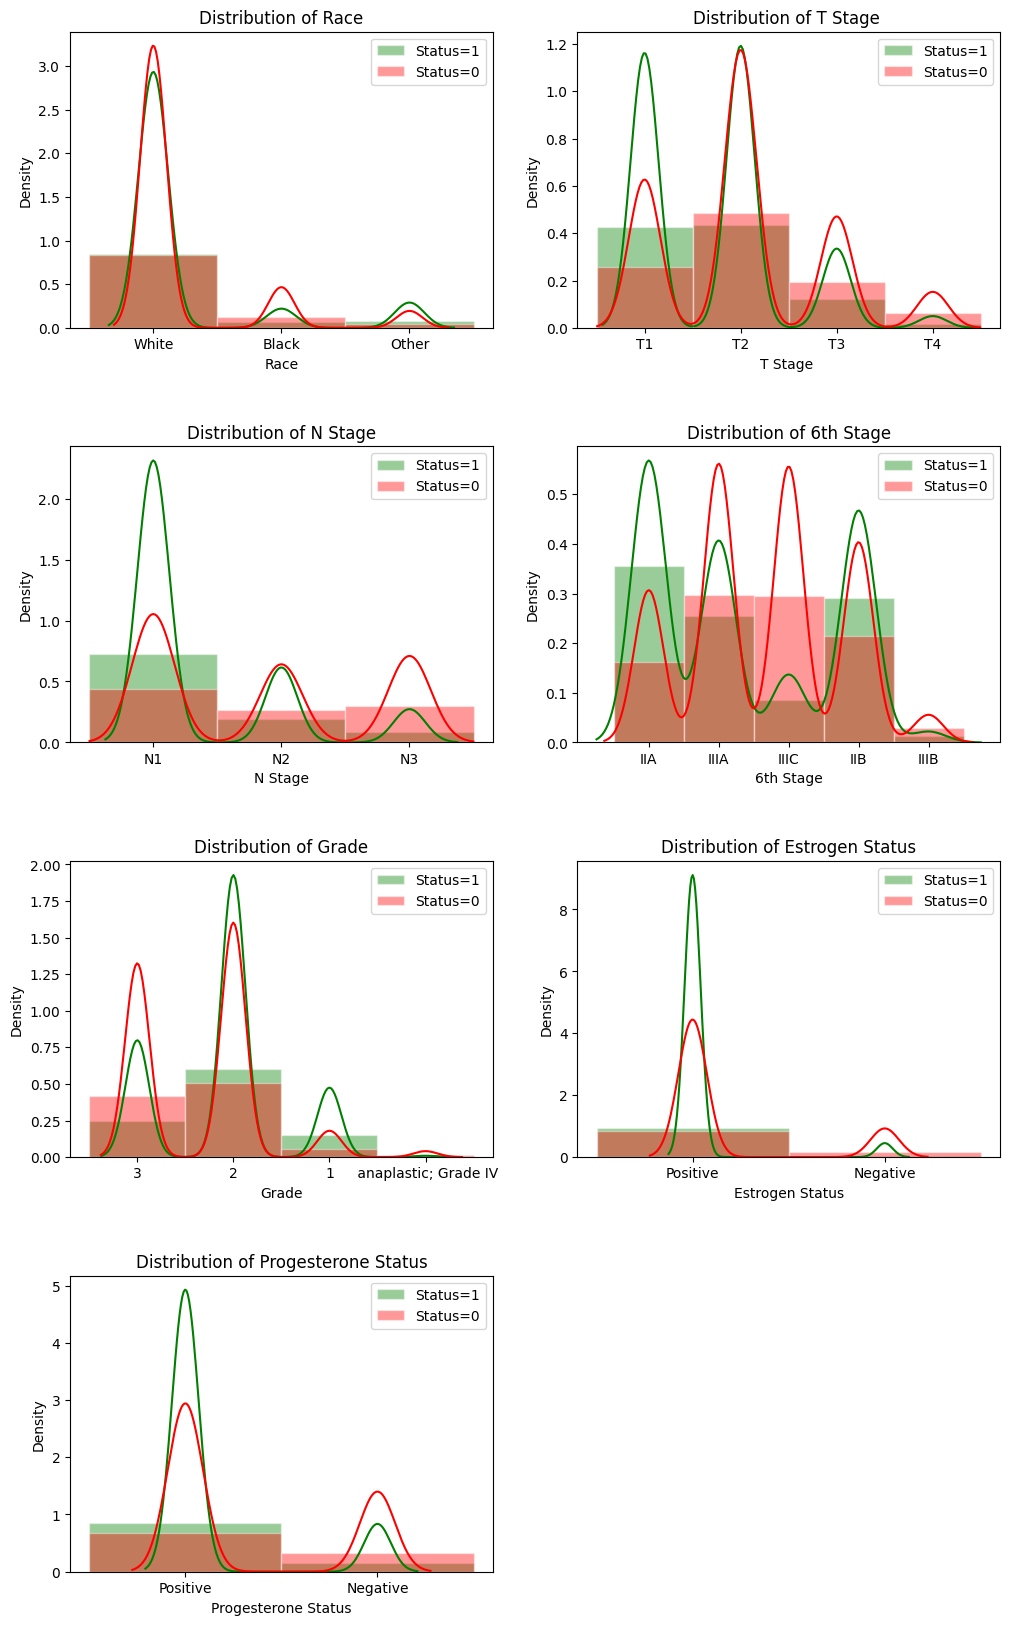

In [ ]:
def plots(df):
    """
    Plot histograms of each feature in the DataFrame, grouped by the 'Status' column.

    Parameters:
    df (DataFrame): The DataFrame containing the features and 'Status'.
    """
    # Calculate the number of subplots needed
    num_vars = df.shape[1] - 1  # Exclude the 'Status' column
    ncols = 2  # Number of columns in the figure
    nrows = int((num_vars + ncols - 1) / ncols)  # Calculate number of rows needed

    # Create subplots
    f, axes = plt.subplots(nrows, ncols, figsize=(12, nrows * 5))
    axes = axes.flatten()  # Flatten the array of axes to loop through them

    # Loop through each feature column to plot
    for ax, col in zip(axes, df.columns):
        if col == 'Status':  # Skip the 'Status' column
            continue

        # Plot density for Status=1
        sns.histplot(df[df.Status == 1][col], kde=True,
                     stat="density", kde_kws=dict(cut=3),
                     color="g", alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax, label="Status=1")

        # Plot density for Status=0
        sns.histplot(df[df.Status == 0][col], kde=True,
                     stat="density", kde_kws=dict(cut=3),
                     color="r", alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax, label="Status=0")

        # Add labels and title
        ax.set_title(f"Distribution of {col}")
        ax.set_xlabel(col)
        ax.set_ylabel('Density')
        ax.legend()
    # Remove remaining empty subplots
    for ax in axes[num_vars:]:
        ax.remove()

    # Improve subplot spacing
    plt.subplots_adjust(hspace=0.4)

    plt.show()

plots(bc_reduced_df)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize LabelEncoder and StandardScaler
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Load the dataset (replace with the actual path to your CSV file)
# bc_reduced_df = pd.read_csv('path/to/your/csv/file.csv')

# Remove extra spaces from column names
bc_reduced_df.columns = bc_reduced_df.columns.str.strip()

# Identify the categorical columns
categorical_columns = ['6th Stage']

# Update the list of categorical columns accordingly
categorical_columns = [col.strip() for col in categorical_columns]

# Loop through each categorical column to perform encoding and normalization
for col in categorical_columns:
    # Encode the categorical variables
    encoded_col = label_encoder.fit_transform(bc_reduced_df[col])

    # Normalize the encoded column
    # Reshape is necessary as the scaler expects a 2D array
    normalized_col = scaler.fit_transform(encoded_col.reshape(-1, 1))

    # Replace the original column with the normalized one
    bc_reduced_df[col] = normalized_col.flatten()

In [ ]:
path = '/content/drive/MyDrive/Datasets'
bc_reduced_df.to_csv(os.path.join(path, 'bc_numeric.csv'), index=False)

In [ ]:
import os
path = '/content/drive/MyDrive/Datasets'
# data_paths = [os.path.join(pth, f) for pth, dirs, files in os.walk('/content/drive/MyDrive') for f in files]
bc_reduced_df.to_csv(os.path.join(path, 'bc_preproc.csv'), index=False)